In [3]:
import requests

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

import pprint

from skimage import io, color, filters
from skimage.transform import resize, rotate


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import scipy
import os
import matplotlib
from matplotlib import pyplot as plt

from PIL import Image


matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.DataFrame.from_dict(attrs, orient='index').T

df

NameError: name 'attrs' is not defined

In [107]:
import ebay_scraper

In [108]:
import requests

import csv

import pandas as pd

from bs4 import BeautifulSoup


def get_page(url):

    response = requests.get(url)

    if not response.ok:
        print('Server responded: ', response.status_code)
    else:
        soup = BeautifulSoup(response.text, 'lxml')
    return soup


def get_detail_data(soup):

    # title
    # price
    # image
    # description

    try:
        # title = soup.find('h1', id='itemTitle').get('span')
        title = soup.find('span', class_='g-hdn').next_sibling
    except:
        title = ''
    
    try:
        p = soup.find('span', id='prcIsum').text.strip()
        currency, price = p.split(' ')
    except:
        price = ''
        currency = ''
    
    try:
        img = soup.find('img', id='icImg').get('src')
    except:
        img = ''
    
    try:
        # desc = [tr.find_all('td') for tr in soup.find('div', id='viTabs_0_is').find('table').find_all('tr')]
        
        table = soup.find('div', id='viTabs_0_is').find('table')
        table_rows = table.find_all('tr')
        
        d = []

        for tr in table_rows:
            td = tr.find_all('td')
            row = [tr.get_text(strip=True) for tr in td]
            d.append(row)

        try:
            cols = [x[0] for x in d] + [x[2] for x in d]
        except:
            cols = [x[0] for x in d]
        try:
            vals = [x[1] for x in d] + [x[3] for x in d]
        except:
            vals = [x[1] for x in d]
        attrs = {k: v for k,v in zip(cols, vals)}

        desc = attrs
        # desc = pd.DataFrame.from_dict(attrs, orient='index').T
    except:
        desc = ''
    
    
    data = {
        'title': title,
        'price': price,
        'currency': currency,
        'image': img,
        'desc': desc
    }

    return data


def get_index_data(soup):

    try:
        links = soup.find_all('a', class_='s-item__link')
    except:
        links = []
    
    urls = [item.get('href') for item in links]

    return urls


def write_csv(data, url, cat):
    
    file_name = str(cat) + '.csv'
    
    with open(file_name, 'a') as csvfile:
        writer = csv.writer(csvfile)

        row = [data['title'], data['price'], data['currency'], data['desc'], data['image'], url]

        writer.writerow(row)




In [109]:
def main(url, cat):
    
    page = 1

    # print(get_detail_data(get_page(url)))
    while requests.get(url).ok==True:

        products = get_index_data(get_page(url))

        for link in products:
            data = get_detail_data(get_page(link))
            write_csv(data, link, cat)

        page += 1

        url = url + '&_pgn=' + str(page)

In [112]:
main('https://www.ebay.com/b/Mens-Boots/11498/bn_56522?rt=nc&LH_ItemCondition=3000', 'boots')

In [4]:
pants = pd.read_csv('./data/pants.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [48]:
pants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22038 entries, 0 to 22156
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         22038 non-null  object
 1   price         18286 non-null  object
 2   currency      18286 non-null  object
 3   attributes    12106 non-null  object
 4   image_link    22038 non-null  object
 5   listing_link  22038 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [5]:
attr = pants[pants['attributes'].notna()].attributes

attr

1        {'Condition:': 'Pre-owned:An item that has bee...
2        {'Condition:': 'Pre-owned:An item that has bee...
3        {'Condition:': 'Pre-owned:An item that has bee...
4        {'Condition:': 'Pre-owned:An item that has bee...
6        {'Condition:': 'Pre-owned:An item that has bee...
8        {'Condition:': 'Pre-owned:An item that has bee...
10       {'Condition:': 'Pre-owned:An item that has bee...
13       {'Condition:': 'Pre-owned:An item that has bee...
14       {'Condition:': 'Pre-owned:An item that has bee...
15       {'Condition:': 'Pre-owned:An item that has bee...
17       {'Condition:': 'Pre-owned:An item that has bee...
18       {'Condition:': 'Pre-owned:An item that has bee...
19       {'Condition:': 'Pre-owned:An item that has bee...
21       {'Condition:': 'Pre-owned:An item that has bee...
23       {'Condition:': 'Pre-owned:An item that has bee...
25       {'Condition:': 'Pre-owned:An item that has bee...
28       {'Condition:': 'Pre-owned:An item that has bee.

In [6]:
pd.DataFrame.from_dict({i: x[i] 
                           for x.items() in attr})

SyntaxError: can't assign to function call (<ipython-input-6-60222e0531d9>, line 2)

In [6]:
pants.iloc[0]

title           Dickies Carpenter Jeans Dungaree Five Pocket H...
price                                                   $19.99/ea
currency                                                       US
attributes                                                    NaN
image_link      https://i.ebayimg.com/images/g/DAoAAOSwaldesiK...
listing_link    https://www.ebay.com/itm/Dickies-Carpenter-Jea...
Name: 0, dtype: object

In [7]:
pants.image_link[0]

'https://i.ebayimg.com/images/g/DAoAAOSwaldesiKQ/s-l300.jpg'

In [8]:
test = io.imread(pants.image_link[0])

In [9]:
print('Type: {}'.format(type(test)))
print('Shape: {}'.format(test.shape))

Type: <class 'numpy.ndarray'>
Shape: (289, 300, 3)


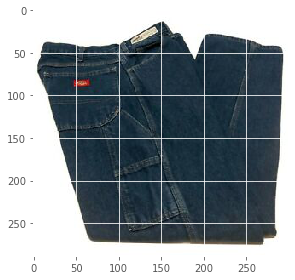

In [12]:
io.imshow(test);

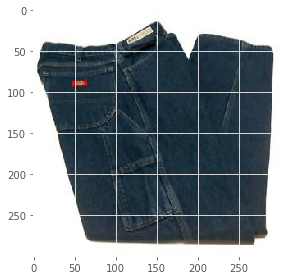

In [13]:
io.imshow(resize(test, (300,300)));

In [14]:
test2 = io.imread(pants.image_link[1])

print('Type: {}'.format(type(test2)))
print('Shape: {}'.format(test2.shape))

Type: <class 'numpy.ndarray'>
Shape: (300, 225, 3)


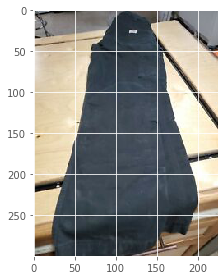

In [15]:
io.imshow(test2)

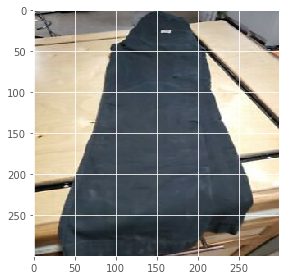

In [16]:
io.imshow(resize(test2, (300,300)));

In [49]:
urls = pd.DataFrame(pants.image_link)

In [46]:
pants = pants.drop(urls[urls.image_link.isnull()].index, axis=0)

In [ ]:
urls = pd.DataFrame(pants.image_link)

In [50]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/pants' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [33]:
counter

72

In [51]:
boots = pd.read_csv('./data/boots.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [52]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38341 non-null  object
 1   price         25289 non-null  object
 2   currency      25289 non-null  object
 3   attributes    26335 non-null  object
 4   image_link    38341 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [56]:
urls = pd.DataFrame(boots.image_link)

In [54]:
boots = boots.drop(urls[urls.image_link.isnull()].index, axis=0)

In [55]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38341 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38341 non-null  object
 1   price         25289 non-null  object
 2   currency      25289 non-null  object
 3   attributes    26335 non-null  object
 4   image_link    38341 non-null  object
 5   listing_link  38341 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [ ]:
urls = pd.DataFrame(boots.image_link)

In [57]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/boots' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [58]:
casual_shirts = pd.read_csv('./data/casual_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [59]:
casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27282 non-null  object
 1   price         19801 non-null  object
 2   currency      19801 non-null  object
 3   attributes    15376 non-null  object
 4   image_link    27282 non-null  object
 5   listing_link  27330 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [60]:
urls = pd.DataFrame(casual_shirts.image_link)

In [63]:
casual_shirts = casual_shirts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [64]:
casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27282 entries, 0 to 27329
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27282 non-null  object
 1   price         19801 non-null  object
 2   currency      19801 non-null  object
 3   attributes    15376 non-null  object
 4   image_link    27282 non-null  object
 5   listing_link  27282 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [65]:
urls = pd.DataFrame(casual_shirts.image_link)

In [66]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/casualshirt' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [67]:
casual_shoes = pd.read_csv('./data/casual_shoes.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [68]:
casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39312 entries, 0 to 39311
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38508 non-null  object
 1   price         28767 non-null  object
 2   currency      28767 non-null  object
 3   attributes    27046 non-null  object
 4   image_link    38508 non-null  object
 5   listing_link  39312 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [69]:
urls = pd.DataFrame(casual_shoes.image_link)

In [70]:
casual_shoes = casual_shoes.drop(urls[urls.image_link.isnull()].index, axis=0)

In [71]:
casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38508 entries, 0 to 39311
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38508 non-null  object
 1   price         28767 non-null  object
 2   currency      28767 non-null  object
 3   attributes    27046 non-null  object
 4   image_link    38508 non-null  object
 5   listing_link  38508 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [72]:
urls = pd.DataFrame(casual_shoes.image_link)

In [73]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/casualshoe' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [74]:
coats_jackets = pd.read_csv('./data/coats_jackets.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [75]:
coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39208 non-null  object
 1   price         29871 non-null  object
 2   currency      29871 non-null  object
 3   attributes    31541 non-null  object
 4   image_link    39208 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [76]:
urls = pd.DataFrame(coats_jackets.image_link)

In [77]:
coats_jackets = coats_jackets.drop(urls[urls.image_link.isnull()].index, axis=0)

In [78]:
coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39208 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39208 non-null  object
 1   price         29871 non-null  object
 2   currency      29871 non-null  object
 3   attributes    31541 non-null  object
 4   image_link    39208 non-null  object
 5   listing_link  39208 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [79]:
urls = pd.DataFrame(coats_jackets.image_link)

In [80]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/coatjacket' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [81]:
dress_shirts = pd.read_csv('./data/dress_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [82]:
dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         21790 non-null  object
 2   currency      21790 non-null  object
 3   attributes    27957 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [83]:
urls = pd.DataFrame(dress_shirts.image_link)

In [84]:
dress_shirts = dress_shirts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [85]:
dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         21790 non-null  object
 2   currency      21790 non-null  object
 3   attributes    27957 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [86]:
urls = pd.DataFrame(dress_shirts.image_link)

In [87]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/dressshirt/dressshirt' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [166]:
dress_shoes = pd.read_csv('./data/dress_shoes.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [167]:
dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39264 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38638 non-null  object
 1   price         25771 non-null  object
 2   currency      25771 non-null  object
 3   attributes    23602 non-null  object
 4   image_link    38638 non-null  object
 5   listing_link  39264 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [168]:
urls = pd.DataFrame(dress_shoes.image_link)

In [169]:
dress_shoes = dress_shoes.drop(urls[urls.image_link.isnull()].index, axis=0)

In [173]:
dress_shoes= dress_shoes.drop(dress_shoes[dress_shoes.image_link.str.contains("shoeffl")].index, axis=0)

In [174]:
dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38599 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38599 non-null  object
 1   price         25732 non-null  object
 2   currency      25732 non-null  object
 3   attributes    23602 non-null  object
 4   image_link    38599 non-null  object
 5   listing_link  38599 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [175]:
urls = pd.DataFrame(dress_shoes.image_link)

In [176]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/dressshoe/dressshoe' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

71

In [135]:
jeans = pd.read_csv('./data/jeans.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [136]:
jeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29083 entries, 0 to 29082
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         28808 non-null  object
 1   price         20828 non-null  object
 2   currency      20828 non-null  object
 3   attributes    19251 non-null  object
 4   image_link    28808 non-null  object
 5   listing_link  29083 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [137]:
urls = pd.DataFrame(jeans.image_link)

In [138]:
jeans = jeans.drop(urls[urls.image_link.isnull()].index, axis=0)

In [139]:
jeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28808 entries, 0 to 29082
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         28808 non-null  object
 1   price         20828 non-null  object
 2   currency      20828 non-null  object
 3   attributes    19251 non-null  object
 4   image_link    28808 non-null  object
 5   listing_link  28808 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [140]:
urls = pd.DataFrame(jeans.image_link)

In [142]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/jeans/jeans' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [177]:
polos = pd.read_csv('./data/polo_shirt.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [178]:
polos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         34299 non-null  object
 1   price         21302 non-null  object
 2   currency      21302 non-null  object
 3   attributes    22274 non-null  object
 4   image_link    34299 non-null  object
 5   listing_link  34299 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [179]:
urls = pd.DataFrame(polos.image_link)

In [180]:
polos = polos.drop(urls[urls.image_link.isnull()].index, axis=0)

In [181]:
polos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 0 to 34298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         34299 non-null  object
 1   price         21302 non-null  object
 2   currency      21302 non-null  object
 3   attributes    22274 non-null  object
 4   image_link    34299 non-null  object
 5   listing_link  34299 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [182]:
urls = pd.DataFrame(polos.image_link)

In [183]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/polos/polo' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [184]:
shorts = pd.read_csv('./data/shorts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [185]:
shorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         26901 non-null  object
 1   price         15266 non-null  object
 2   currency      15266 non-null  object
 3   attributes    21243 non-null  object
 4   image_link    26901 non-null  object
 5   listing_link  27070 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [186]:
urls = pd.DataFrame(shorts.image_link)

In [187]:
shorts = shorts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [188]:
shorts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26901 entries, 0 to 27069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         26901 non-null  object
 1   price         15266 non-null  object
 2   currency      15266 non-null  object
 3   attributes    21243 non-null  object
 4   image_link    26901 non-null  object
 5   listing_link  26901 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [189]:
urls = pd.DataFrame(shorts.image_link)

In [190]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/shorts/shorts' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [191]:
sneakers = pd.read_csv('./data/sneakers.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [192]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39264 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         32132 non-null  object
 1   price         27237 non-null  object
 2   currency      27237 non-null  object
 3   attributes    27039 non-null  object
 4   image_link    32132 non-null  object
 5   listing_link  39264 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [193]:
urls = pd.DataFrame(sneakers.image_link)

In [194]:
sneakers = sneakers.drop(urls[urls.image_link.isnull()].index, axis=0)

In [198]:
sneakers[sneakers.image_link.str.contains("shoeffl")]

,title,price,currency,attributes,image_link,listing_link


In [195]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32132 entries, 0 to 39263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         32132 non-null  object
 1   price         27237 non-null  object
 2   currency      27237 non-null  object
 3   attributes    27039 non-null  object
 4   image_link    32132 non-null  object
 5   listing_link  32132 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


In [196]:
urls = pd.DataFrame(sneakers.image_link)

In [199]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/sneakers/sneakers' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [205]:
suits = pd.read_csv('./data/suits_blazers.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [206]:
suits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38910 non-null  object
 1   price         15365 non-null  object
 2   currency      15365 non-null  object
 3   attributes    16168 non-null  object
 4   image_link    38910 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [207]:
urls = pd.DataFrame(suits.image_link)

In [208]:
suits = suits.drop(urls[urls.image_link.isnull()].index, axis=0)

In [209]:
suits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38910 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38910 non-null  object
 1   price         15365 non-null  object
 2   currency      15365 non-null  object
 3   attributes    16168 non-null  object
 4   image_link    38910 non-null  object
 5   listing_link  38910 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [210]:
urls = pd.DataFrame(suits.image_link)

In [211]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/suits/suit' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [219]:
sweaters = pd.read_csv('./data/sweaters.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [220]:
sweaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         26141 non-null  object
 2   currency      26141 non-null  object
 3   attributes    28071 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [221]:
urls = pd.DataFrame(sweaters.image_link)

In [222]:
suits = suits.drop(urls[urls.image_link.isnull()].index, axis=0)

In [223]:
sweaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39216 non-null  object
 1   price         26141 non-null  object
 2   currency      26141 non-null  object
 3   attributes    28071 non-null  object
 4   image_link    39216 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [224]:
urls = pd.DataFrame(sweaters.image_link)

In [225]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/sweaters/sweater' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1

In [226]:
tees = pd.read_csv('./data/t_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [227]:
tees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27033 entries, 0 to 27032
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27033 non-null  object
 1   price         19681 non-null  object
 2   currency      19681 non-null  object
 3   attributes    19873 non-null  object
 4   image_link    27033 non-null  object
 5   listing_link  27033 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [228]:
urls = pd.DataFrame(tees.image_link)

In [229]:
tees = tees.drop(urls[urls.image_link.isnull()].index, axis=0)

In [230]:
tees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27033 entries, 0 to 27032
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27033 non-null  object
 1   price         19681 non-null  object
 2   currency      19681 non-null  object
 3   attributes    19873 non-null  object
 4   image_link    27033 non-null  object
 5   listing_link  27033 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [231]:
urls = pd.DataFrame(tees.image_link)

In [232]:
rows = []

for index, i in urls.iterrows():
    rows.append(i[-1])

counter = 0

for i in rows:
    file_name = './imgs/tshirts/tshirt' + str(counter) + '.jpg'

    response = requests.get(i)
    file = open(file_name, "wb")
    file.write(response.content)
    file.close()
    counter += 1